In [1]:
import numpy as np
import pandas as pd

In [34]:
df_data = pd.read_csv('Data_Science_Topics_Survey.csv')
df_data.drop(['Timestamp'], axis = 1, inplace = True)
df_data.rename(columns={"What's your level of interest for the following areas of Data Science? [Data Visualization]":'Data Visualization', "What's your level of interest for the following areas of Data Science? [Machine Learning]":'Machine Learning', "What's your level of interest for the following areas of Data Science? [Data Analysis / Statistics]":'Data Analysis / Statistics', "What's your level of interest for the following areas of Data Science? [Big Data (Spark / Hadoop)]":'Big Data (Spark / Hadoop)', "What's your level of interest for the following areas of Data Science? [Data Journalism]":'Data Journalism', "What's your level of interest for the following areas of Data Science? [Deep Learning]":'Deep Learning'}, inplace = True)

df_data.head()

,Data Visualization,Machine Learning,Data Analysis / Statistics,Big Data (Spark / Hadoop),Data Journalism,Deep Learning
0,Very interested,Very interested,Somewhat interested,Not interested,Somewhat interested,Somewhat interested
1,Very interested,Very interested,Very interested,Somewhat interested,Not interested,Very interested
2,Not interested,Very interested,Somewhat interested,Very interested,Not interested,Very interested
3,Very interested,Very interested,Very interested,Very interested,Somewhat interested,Very interested
4,Somewhat interested,Very interested,Very interested,Very interested,Not interested,Somewhat interested


In [22]:
# loop returns all the column names

columnvalue =[]

for col in df_data:
    columnvalue.append(col)

In [4]:
columnvalue

['Data Visualization',
 'Machine Learning',
 'Data Analysis / Statistics',
 'Big Data (Spark / Hadoop)',
 'Data Journalism',
 'Deep Learning']

In [37]:
dt_f = df_data.apply(pd.value_counts).transpose()

In [38]:
dt_f

,Not interested,Somewhat interested,Very interested
Data Visualization,102,734,1340
Machine Learning,74,477,1629
Data Analysis / Statistics,60,444,1688
Big Data (Spark / Hadoop),127,729,1332
Data Journalism,610,1081,429
Deep Learning,136,770,1263


In [39]:
dt_f.sort_index(axis = 1, level = 'Very interested', inplace = True, ascending = False)
dt_f

,Very interested,Somewhat interested,Not interested
Data Visualization,1340,734,102
Machine Learning,1629,477,74
Data Analysis / Statistics,1688,444,60
Big Data (Spark / Hadoop),1332,729,127
Data Journalism,429,1081,610
Deep Learning,1263,770,136


In [43]:
type(dt_f)

pandas.core.frame.DataFrame

In [48]:
dt_f.sort_values(['Very interested'], inplace = True, ascending = False)
dt_f

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [50]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [57]:
dt_f.transpose()

,Data Analysis / Statistics,Machine Learning,Data Visualization,Big Data (Spark / Hadoop),Deep Learning,Data Journalism
Very interested,1688,1629,1340,1332,1263,429
Somewhat interested,444,477,734,729,770,1081
Not interested,60,74,102,127,136,610


In [58]:
dt_f.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


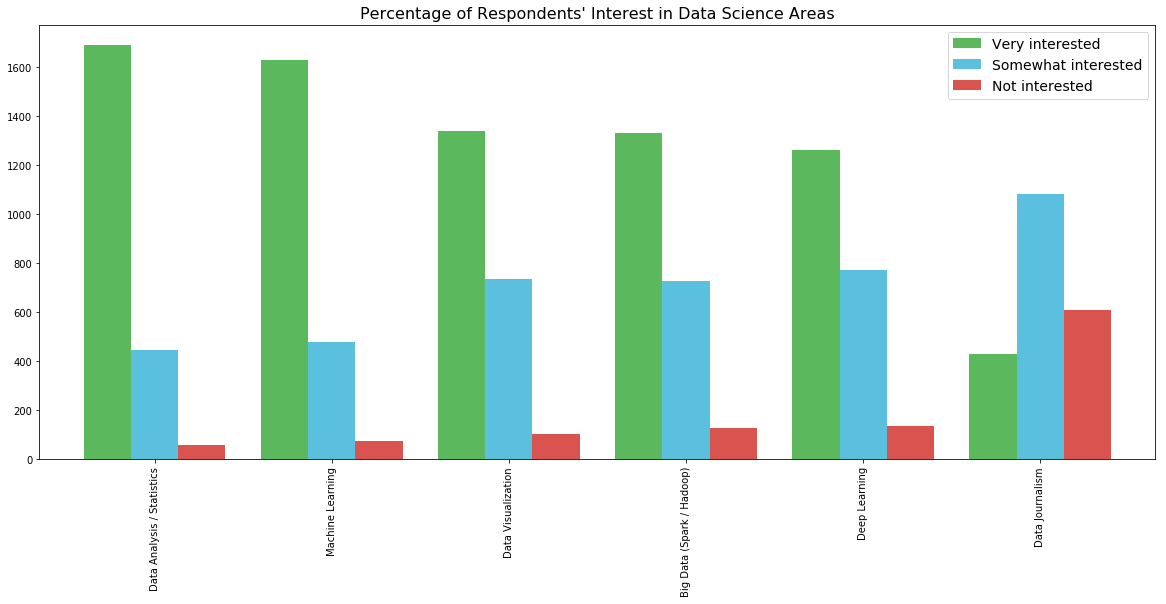

In [84]:
dt_f.plot(kind='bar', 
          figsize = (20, 8), 
          width = 0.8, 
          color = ('#5cb85c', '#5bc0de', '#d9534f'), 
          linewidth=0, 
          edgecolor = "none")
tt = "Percentage of Respondents' Interest in Data Science Areas"
plt.title(tt, fontdict ={'fontsize': 16})
plt.legend(fontsize = 14)

plt.show()

In [ ]:
df_total = df['Total Cost']
df = df.iloc[:, 0:4]
df.plot(x = 'Airport', kind='barh',stacked = True, title = 'Breakdown of Costs', mark_right = True)

df_rel = df[df.columns[1:]].div(df_total, 0)*100

for n in df_rel:
    for i, (cs, ab, pc, tot) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_rel[n], df_total)):
        plt.text(tot, i, str(tot), va='center')
        plt.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va='center', ha='center')